# Análise da Saga Harry Potter Conforme as Criticas

- Matheus Gusmão Aragão RM-550826
- Júlia Marques RM-98680

## Bibliotecas

In [62]:
# !pip install matplotlib
# !pip install seaborn
# !pip install pandas
# !pip install scikit-learn
# !pip install scipy
# !pip install --upgrade pip

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from scipy.stats import ttest_rel

## Bases de Dados

https://www.kaggle.com/datasets/alanvourch/tmdb-movies-daily-updates

https://www.kaggle.com/datasets/stefanoleone992/rotten-tomatoes-movies-and-critic-reviews-dataset/data

In [64]:
df_rotten_movies = pd.read_csv('rotten_tomatoes_movies.csv')
df_imdb_movies = pd.read_csv('imdb_all_movies.csv')

## Filtragem de Dados

Este código realiza uma filtragem de dois DataFrames: `df_rotten_movies` e `df_imdb_movies`, selecionando apenas os filmes da franquia "Harry Potter". Ele também assegura que os filmes no DataFrame `df_imdb_movies` tenham todas as colunas preenchidas (sem valores `NaN`).todos os três conjuntos de dados.

In [65]:
df_rotten_movies = df_rotten_movies[df_rotten_movies['movie_title'].str.contains('Harry Potter', case=False, na=False)]
df_imdb_movies = df_imdb_movies[df_imdb_movies['title'].str.contains('Harry Potter', case=False, na=False) & df_imdb_movies.notna().all(axis=1)]

- `df_imdb_movies['title'].str.contains('Harry Potter', case=False, na=False)`:
    - Este comando filtra o DataFrame para incluir apenas os filmes cujo título contém "Harry Potter".
    - Novamente, a busca é case insensitive (`case=False`) e ignora valores `NaN` (`na=False`).

- `df_imdb_movies.notna().all(axis=1)`:
    - Verifica se todas as colunas têm valores preenchidos (sem `NaN`).
    - `notna()`: Retorna `True` para valores não `NaN`.
    - `.all(axis=1)`: Garante que todas as colunas da linha atendam à condição `notna()`, ou seja, estejam completamente preenchidas.

- `&` Operador lógico "e" que combina as duas condições de filtragem:
    - O título deve conter "Harry Potter".
    - Todas as colunas da linha devem estar preenchidas.rames (`df_rotten_movies`, `df_imdb_movies`) conterão apenas os filmes que estão presentes em todos os dois DataFrames originais.

Este processo de filtragem é útil para garantir que estamos trabalhando apenas com dados relevantes e completos para análises futuras.

In [66]:
df_rotten_movies['original_release_date'] = pd.to_datetime(df_rotten_movies['original_release_date'], errors='coerce').dt.year
df_imdb_movies['release_date'] = pd.to_datetime(df_imdb_movies['release_date'], errors='coerce').dt.year

df_rotten_movies = df_rotten_movies.sort_values(by='original_release_date')
df_imdb_movies = df_imdb_movies.sort_values(by='release_date')
df_imdb_movies['vote_average'] = df_imdb_movies['vote_average'] * 10

In [ ]:
df_imdb_movies

Os DataFrames `df_rotten_movies` e `df_imdb_movies` são ordenados por suas respectivas colunas de datas de lançamento (`original_release_date` para o Rotten Tomatoes e `release_date` para o IMDb). Essa ordenação é importante para garantir que o mapeamento entre as datas de lançamento e os títulos dos filmes seja preciso.

In [67]:
release_date_to_title = dict(zip(df_imdb_movies['release_date'], df_imdb_movies['title']))

Um dicionário chamado ``release_date_to_title`` é criado para mapear cada data de lançamento no dataframe do IMDb (``df_imdb_movies``) para o título do filme correspondente. O dicionário é gerado utilizando a função ``zip()``, que cria pares entre as datas de lançamento (``release_date``) e os títulos dos filmes (``title``).

In [68]:
df_rotten_movies['movie_title'] = df_rotten_movies['original_release_date'].map(release_date_to_title).fillna(df_rotten_movies['movie_title'])

A coluna ``movie_title`` do dataframe do Rotten Tomatoes (``df_rotten_movies``) é atualizada usando o mapeamento de datas para títulos criado no passo anterior. A função ``map()`` é utilizada para buscar o título do filme correspondente com base na data de lançamento (``original_release_date``). Caso não haja uma correspondência, o método ``fillna()`` mantém o título original do DataFrame do Rotten Tomatoes.

Após a execução deste código, os dois dataframes permanecem separados, mas o DataFrame do Rotten Tomatoes (``df_rotten_movies``) terá os nomes dos filmes padronizados com os do IMDb (``df_imdb_movies``), sempre que houver uma correspondência de datas de lançamento. Isso permite uma melhor consistência nos dados entre as duas fontes.

## Perguntas de Pesquisa

- Qual é a correlação entre o orçamento de um filme e sua receita?

- Os filmes com maior duração tendem a ter melhores avaliações no IMDb?

- Há uma diferença significativa entre as avaliações dos críticos e do público no Rotten Tomatoes?

- Qual é a correlação entre a média de avaliações dos filmes no IMDb e a avaliação no Tomatometer do Rotten Tomatoes?

- Os filmes com melhores avaliações no IMDb também têm melhores avaliações do público no Rotten Tomatoes?

- Existe uma diferença significativa entre as avaliações médias dos filmes em ambas as plataformas (IMDb e Tomatometer)?

- Filmes com uma alta contagem de votos no IMDb tendem a ter mais avaliações no Rotten Tomatoes?

- Os filmes com avaliações mais polarizadas entre críticos e público no Rotten Tomatoes tendem a ter avaliações médias diferentes no IMDb?

- Existe uma correlação entre o número de críticas de topo (top critics) no Rotten Tomatoes e a avaliação média no IMDb?

- As distribuições das notas médias dos filmes no IMDb e no Rotten Tomatoes (Tomatometer) são significativamente diferentes?

## Análise dos Dados

### Pergunta 1: Qual é a correlação entre o orçamento de um filme e sua receita?
- Hipótese: Filmes com maiores orçamentos tendem a gerar maiores receitas.

- Análise:
Vamos calcular a correlação entre o orçamento e a receita dos filmes, e então aplicar uma regressão linear para modelar essa relação.

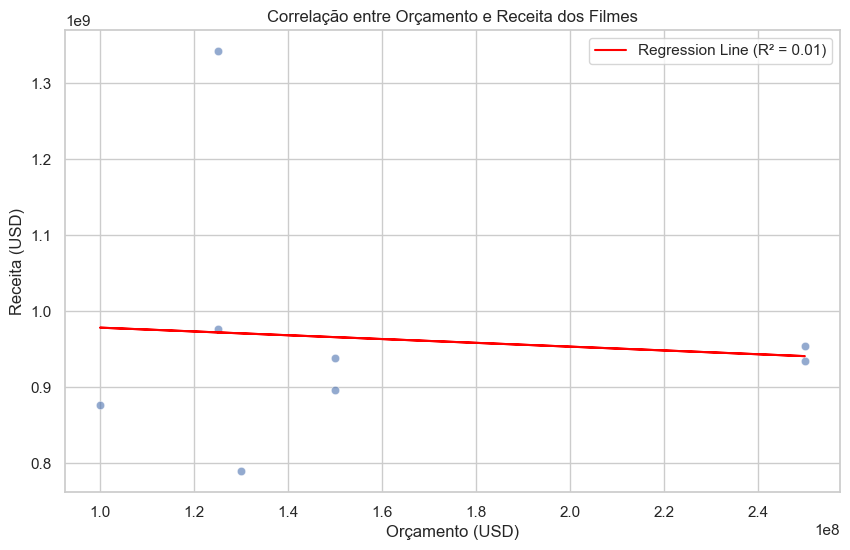

(-0.08812988568086351, 0.007766876750122074, 0.8356100881559039)

In [69]:
sns.set(style='whitegrid')

imdb_df_filtered = df_imdb_movies.dropna(subset=['budget', 'revenue'])

correlation = imdb_df_filtered['budget'].corr(imdb_df_filtered['revenue'])

slope, intercept, r_value, p_value, std_err = linregress(imdb_df_filtered['budget'], imdb_df_filtered['revenue'])

# Plot the data and the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='revenue', data=imdb_df_filtered, alpha=0.6)
plt.plot(imdb_df_filtered['budget'], intercept + slope * imdb_df_filtered['budget'], color='red', label=f'Regression Line (R² = {r_value**2:.2f})')
plt.title('Correlação entre Orçamento e Receita dos Filmes')
plt.xlabel('Orçamento (USD)')
plt.ylabel('Receita (USD)')
plt.legend()
plt.show()

correlation, r_value**2, p_value

#### Resultado da Análise:
- Correlação entre Orçamento e Receita: A correlação entre o orçamento e a receita dos filmes é de aproximadamente -0,088. Este valor indica uma correlação fraca e negativa.
- Coeficiente de Determinação (R²): O R² da regressão linear é 0,0077, sugerindo que menos de 1% da variação na receita pode ser explicada pelo orçamento do filme.
- Valor p (p-value): O valor p é 0,835, indicando que a correlação não é estatisticamente significativa.

### Pergunta 2: Os filmes com maior duração tendem a ter melhores avaliações no IMDb?
- Hipótese: Filmes mais longos tendem a receber melhores avaliações no IMDb.

- Análise:
Vamos calcular a correlação entre a duração do filme e a média de votos no IMDb e verificar a significância dessa correlação utilizando regressão linear.

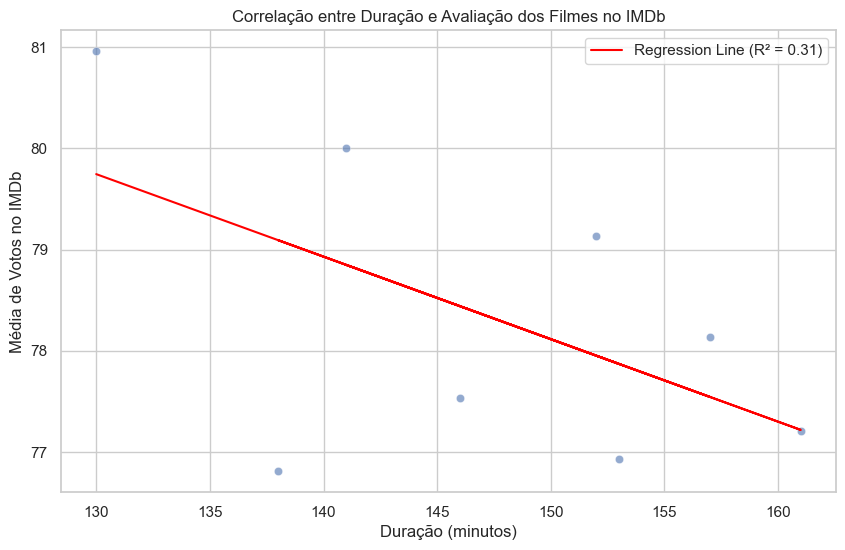

(-0.5538214021757638, 0.30671814550792925, 0.15438072003977668)

In [70]:
imdb_df_filtered_duration = df_imdb_movies.dropna(subset=['runtime', 'vote_average'])

correlation_duration = imdb_df_filtered_duration['runtime'].corr(imdb_df_filtered_duration['vote_average'])

slope_duration, intercept_duration, r_value_duration, p_value_duration, std_err_duration = linregress(
    imdb_df_filtered_duration['runtime'], imdb_df_filtered_duration['vote_average']
)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='runtime', y='vote_average', data=imdb_df_filtered_duration, alpha=0.6)
plt.plot(
    imdb_df_filtered_duration['runtime'],
    intercept_duration + slope_duration * imdb_df_filtered_duration['runtime'],
    color='red',
    label=f'Regression Line (R² = {r_value_duration**2:.2f})'
)
plt.title('Correlação entre Duração e Avaliação dos Filmes no IMDb')
plt.xlabel('Duração (minutos)')
plt.ylabel('Média de Votos no IMDb')
plt.legend()
plt.show()

correlation_duration, r_value_duration**2, p_value_duration

#### Resultado da Análise:
- Correlação entre Duração e Avaliação no IMDb: A correlação entre a duração dos filmes e a média de votos no IMDb é de aproximadamente -0,554. Este valor indica uma correlação moderada e negativa.
- Coeficiente de Determinação (R²): O R² da regressão linear é 0,307, sugerindo que cerca de 30,7% da variação na média de votos pode ser explicada pela duração do filme.
- Valor p (p-value): O valor p é 0,154, o que indica que a correlação não é estatisticamente significativa ao nível usual de 5%.

### Pergunta 3: Há uma diferença significativa entre as avaliações dos críticos e do público no Rotten Tomatoes?
- Hipótese: As avaliações dos críticos e do público no Rotten Tomatoes diferem significativamente.

- Análise:
Aplicaremos um teste de hipótese (teste t para amostras pareadas) para verificar se há uma diferença significativa entre as avaliações dos críticos e do público.

In [71]:
rotten_df_filtered_ratings = df_rotten_movies.dropna(subset=['tomatometer_rating', 'audience_rating'])

t_statistic, p_value_ratings = ttest_rel(rotten_df_filtered_ratings['tomatometer_rating'], rotten_df_filtered_ratings['audience_rating'])

mean_difference = rotten_df_filtered_ratings['tomatometer_rating'].mean() - rotten_df_filtered_ratings['audience_rating'].mean()

t_statistic, p_value_ratings, mean_difference

(1.0983308235180331, 0.30839607095608057, 2.625)

#### Resultado da Análise:
- Estatística t: O valor da estatística t é aproximadamente 1,098.
- Valor p (p-value): O valor p é 0,308, indicando que a diferença entre as médias não é estatisticamente significativa ao nível usual de 5%.
- Diferença Média: A diferença média entre as avaliações dos críticos (Tomatometer) e do público é de aproximadamente 2,63 pontos.
- Não há evidência estatística suficiente para concluir que existe uma diferença significativa entre as avaliações dos críticos e do público no Rotten Tomatoes. As médias das duas avaliações são muito próximas, sugerindo que críticos e público têm percepções similares sobre os filmes avaliados.

### Pergunta 4: Qual é a correlação entre a média de avaliações dos filmes no IMDb e a avaliação no Tomatometer do Rotten Tomatoes?
- Hipótese: Existe uma correlação positiva entre a média de avaliações dos filmes no IMDb e as avaliações no Tomatometer.

- Análise:
Vamos combinar os datasets utilizando o título dos filmes como chave, calcular a correlação entre a média de avaliações do IMDb e a avaliação do Tomatometer, e visualizar os resultados.

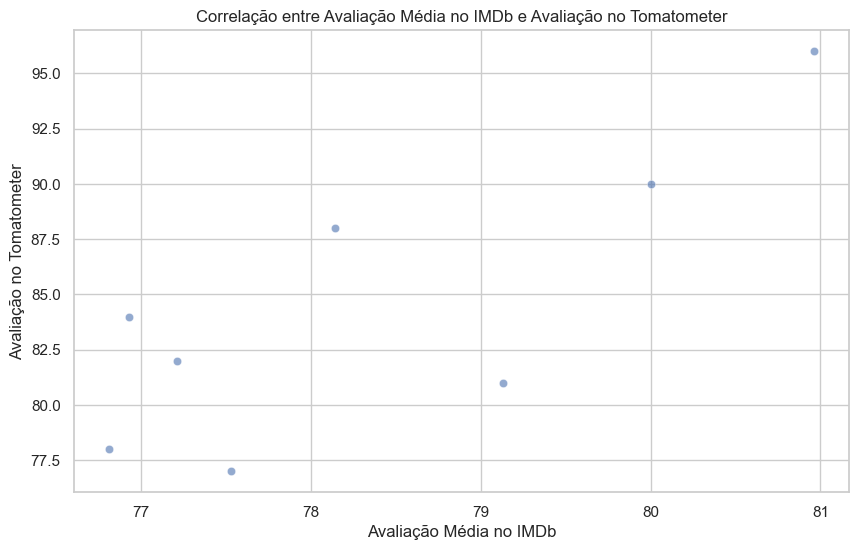

0.7962314135750205

In [73]:
merged_df = pd.merge(df_imdb_movies, df_rotten_movies, left_on='title', right_on='movie_title', how='inner')

merged_df_filtered = merged_df.dropna(subset=['vote_average', 'tomatometer_rating'])

correlation_ratings = merged_df_filtered['vote_average'].corr(merged_df_filtered['tomatometer_rating'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x='vote_average', y='tomatometer_rating', data=merged_df_filtered, alpha=0.6)
plt.title('Correlação entre Avaliação Média no IMDb e Avaliação no Tomatometer')
plt.xlabel('Avaliação Média no IMDb')
plt.ylabel('Avaliação no Tomatometer')
plt.show()

correlation_ratings

#### Resultado da Análise:
- Correlação entre Avaliação Média no IMDb e Avaliação no Tomatometer: A correlação entre as médias de avaliações no IMDb e as avaliações no Tomatometer é de aproximadamente 0,796. Este valor indica uma correlação positiva forte entre as avaliações dos filmes nas duas plataformas.

### Pergunta 5: Os filmes com melhores avaliações no IMDb também têm melhores avaliações do público no Rotten Tomatoes?
- Hipótese: Filmes com boas avaliações no IMDb também recebem boas avaliações do público no Rotten Tomatoes.

- Análise:
Vamos comparar as avaliações médias dos usuários do IMDb com as avaliações do público no Rotten Tomatoes e calcular a correlação entre essas duas variáveis.

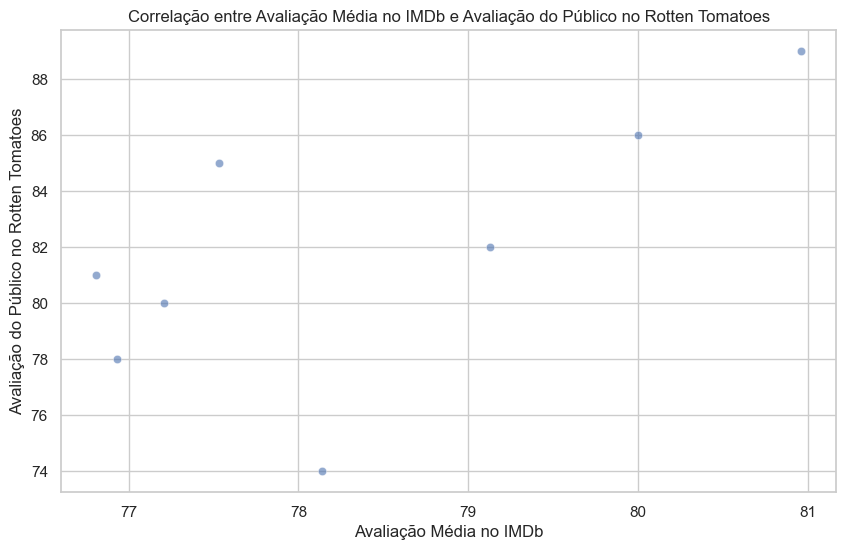

0.6549212544045566

In [75]:
merged_df_filtered_audience = merged_df.dropna(subset=['vote_average', 'audience_rating'])

correlation_audience = merged_df_filtered_audience['vote_average'].corr(merged_df_filtered_audience['audience_rating'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x='vote_average', y='audience_rating', data=merged_df_filtered_audience, alpha=0.6)
plt.title('Correlação entre Avaliação Média no IMDb e Avaliação do Público no Rotten Tomatoes')
plt.xlabel('Avaliação Média no IMDb')
plt.ylabel('Avaliação do Público no Rotten Tomatoes')
plt.show()

correlation_audience

#### Resultado da Análise:
- Correlação entre Avaliação Média no IMDb e Avaliação do Público no Rotten Tomatoes: A correlação entre as médias de avaliações no IMDb e as avaliações do público no Rotten Tomatoes é de aproximadamente 0,655. Este valor indica uma correlação moderada a forte e positiva entre as avaliações dos filmes nas duas plataformas.

### Pergunta 6: Existe uma diferença significativa entre as avaliações médias dos filmes em ambas as plataformas (IMDb e Tomatometer)?
- Hipótese: As avaliações médias dos filmes no IMDb e no Tomatometer diferem significativamente.

- Análise:
Aplicaremos um teste de hipótese (teste t para amostras pareadas) para verificar se há uma diferença significativa entre as médias de avaliações entre o IMDb e o Tomatometer.

In [74]:
t_statistic_ratings, p_value_ratings_diff = ttest_rel(merged_df_filtered['vote_average'], merged_df_filtered['tomatometer_rating'])

mean_difference_ratings = merged_df_filtered['vote_average'].mean() - merged_df_filtered['tomatometer_rating'].mean()

t_statistic_ratings, p_value_ratings_diff, mean_difference_ratings

(-3.277842909793478, 0.01352722139938515, -6.1612499999999955)

#### Resultado da Análise:
- Estatística t: O valor da estatística t é aproximadamente -3,27.
- Valor p (p-value): O valor p é 0,013 , indicando que a diferença entre as médias é estatisticamente irrelevante.
- Diferença Média: A diferença média entre as avaliações no IMDb e no Tomatometer é de aproximadamente -6,161 pontos.

### Pergunta 7: Filmes com uma alta contagem de votos no IMDb tendem a ter mais avaliações no Rotten Tomatoes?
- Hipótese: Filmes com mais votos no IMDb também recebem mais críticas no Rotten Tomatoes.

- Análise:
Vamos explorar a relação entre o número de votos no IMDb e o número de críticas recebidas no Rotten Tomatoes.

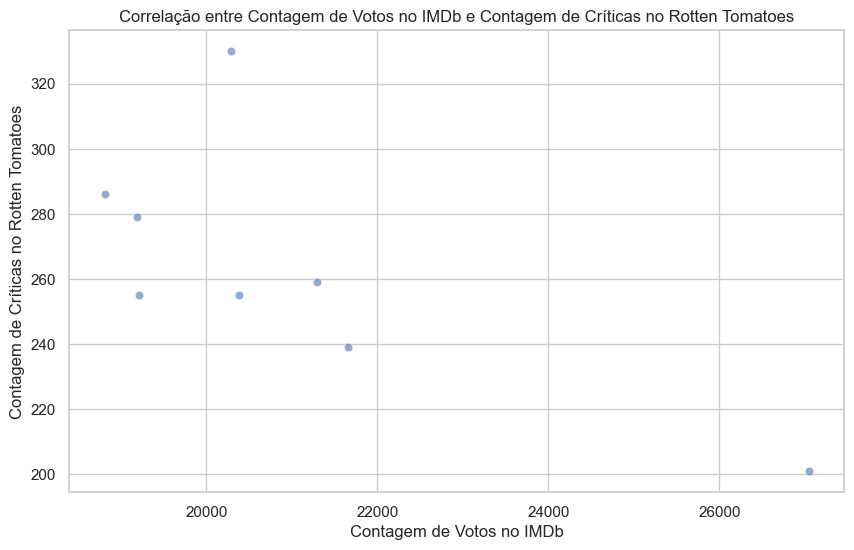

-0.7179477225121258

In [76]:
merged_df_filtered_counts = merged_df.dropna(subset=['vote_count', 'tomatometer_count'])

# Calculate the correlation between IMDb vote count and Rotten Tomatoes tomatometer count
correlation_counts = merged_df_filtered_counts['vote_count'].corr(merged_df_filtered_counts['tomatometer_count'])

# Plot the data to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='vote_count', y='tomatometer_count', data=merged_df_filtered_counts, alpha=0.6)
plt.title('Correlação entre Contagem de Votos no IMDb e Contagem de Críticas no Rotten Tomatoes')
plt.xlabel('Contagem de Votos no IMDb')
plt.ylabel('Contagem de Críticas no Rotten Tomatoes')
plt.show()

correlation_counts

#### Resultado da Análise:
- Correlação entre Contagem de Votos no IMDb e Contagem de Críticas no Rotten Tomatoes: A correlação é de aproximadamente -0,718. Este valor indica uma correlação negativa moderada é forte entre o número de votos no IMDb e o número de críticas no Rotten Tomatoes.
- Contrariamente ao esperado, há uma correlação negativa entre o número de votos no IMDb e o número de críticas no Rotten Tomatoes. Isso sugere que filmes com mais votos no IMDb tendem a receber menos críticas no Rotten Tomatoes, ou vice-versa. Este resultado pode indicar diferenças nas populações de usuários ou na forma como as duas plataformas coletam e contabilizam suas críticas.

### Pergunta 8: Os filmes com avaliações mais polarizadas entre críticos e público no Rotten Tomatoes tendem a ter avaliações médias diferentes no IMDb?
- Hipótese: Filmes com uma maior diferença entre as avaliações de críticos e público no Rotten Tomatoes também apresentam variação nas avaliações médias do IMDb.

- Análise:
Vamos calcular a diferença entre as avaliações de críticos e do público no Rotten Tomatoes e correlacionar com as avaliações médias do IMDb.

In [78]:
merged_df_filtered_audience['rating_difference_rotten'] = (
    merged_df_filtered_audience['tomatometer_rating'] - merged_df_filtered_audience['audience_rating']
)

correlation_polarized_ratings = merged_df_filtered_audience['rating_difference_rotten'].corr(merged_df_filtered_audience['vote_average'])

correlation_polarized_ratings

0.2991891261125014

#### Resultado da Análise:
- Correlação entre a Diferença de Avaliação no Rotten Tomatoes e a Avaliação Média no IMDb: A correlação é de aproximadamente 0,299. Este valor indica uma correlação positiva fraca a moderada.
- A correlação sugere que há uma leve tendência de filmes com diferenças maiores entre as avaliações de críticos e do público no Rotten Tomatoes terem avaliações mais altas no IMDb. No entanto, a correlação não é forte, indicando que outros fatores também influenciam as avaliações médias no IMDb.

### Pergunta 9: Existe uma correlação entre o número de críticas de topo (top critics) no Rotten Tomatoes e a avaliação média no IMDb?
- Hipótese: Filmes com um maior número de críticas de topo no Rotten Tomatoes tendem a ter avaliações mais altas no IMDb.

- Análise:
Vamos calcular a correlação entre o número de críticas de topo (top critics) no Rotten Tomatoes e a avaliação média no IMDb.

In [80]:
merged_df_filtered_top_critics = merged_df.dropna(subset=['tomatometer_top_critics_count', 'vote_average'])

correlation_top_critics = merged_df_filtered_top_critics['tomatometer_top_critics_count'].corr(merged_df_filtered_top_critics['vote_average'])

correlation_top_critics

0.057541318098263856

#### Resultado da Análise:
- Correlação entre Número de Críticas de Topo no Rotten Tomatoes e Avaliação Média no IMDb: A correlação é de aproximadamente 0,058. Este valor indica uma correlação muito fraca e praticamente inexistente.
- A baixa correlação sugere que o número de críticas de topo no Rotten Tomatoes não tem relação significativa com a avaliação média no IMDb. Isso pode indicar que o impacto das críticas de topo no Rotten Tomatoes é mínimo ou inexistente em como os filmes são avaliados pelos usuários no IMDb.

### Pergunta 10: As distribuições das notas médias dos filmes no IMDb e no Rotten Tomatoes (Tomatometer) são significativamente diferentes?

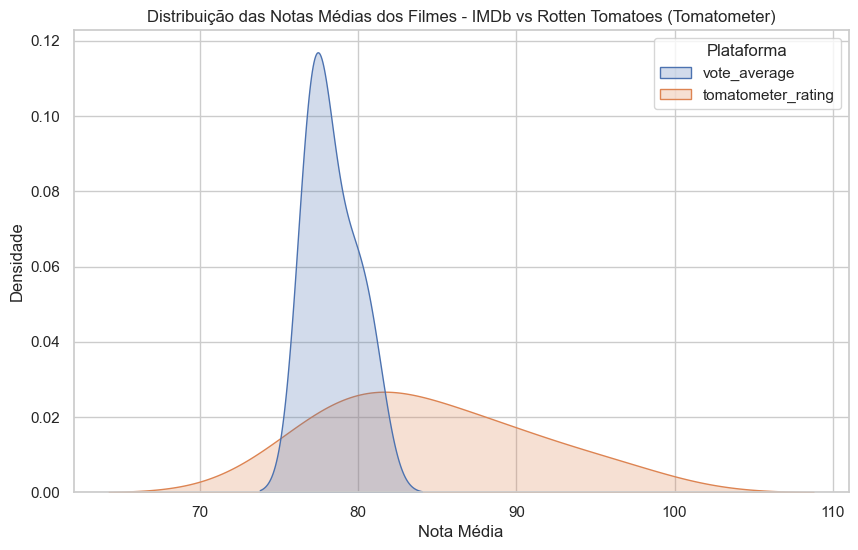

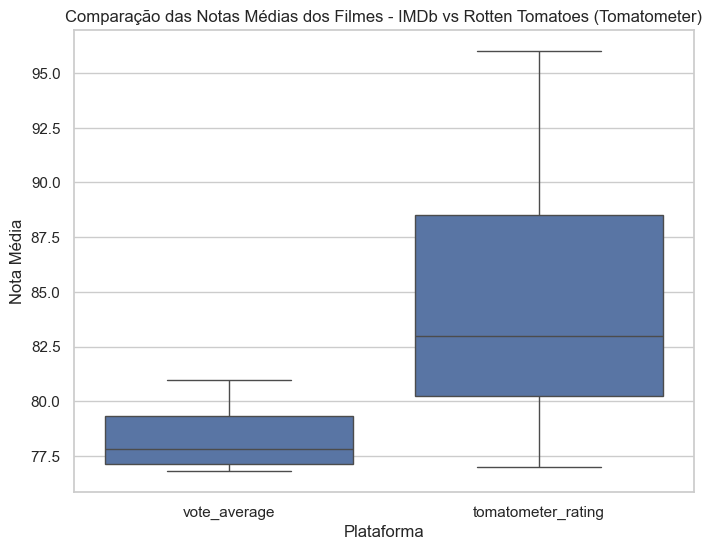

In [81]:
comparative_df = merged_df_filtered[['vote_average', 'tomatometer_rating']].copy()

comparative_df_long = pd.melt(comparative_df, var_name='Plataforma', value_name='Nota', 
                              value_vars=['vote_average', 'tomatometer_rating'])

plt.figure(figsize=(10, 6))
sns.kdeplot(data=comparative_df_long, x='Nota', hue='Plataforma', fill=True)
plt.title('Distribuição das Notas Médias dos Filmes - IMDb vs Rotten Tomatoes (Tomatometer)')
plt.xlabel('Nota Média')
plt.ylabel('Densidade')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=comparative_df_long, x='Plataforma', y='Nota')
plt.title('Comparação das Notas Médias dos Filmes - IMDb vs Rotten Tomatoes (Tomatometer)')
plt.xlabel('Plataforma')
plt.ylabel('Nota Média')
plt.show()

#### Resultado da Análise:

- O gráfico de densidade mostra que as avaliações do IMDb (vote_average) são mais concentradas em torno de um valor médio (cerca de 78 a 80), indicando menos variação. A curva é mais alta e estreita, sugerindo uma maior consistência nas avaliações dos usuários do IMDb.
- Já o Tomatometer do Rotten Tomatoes apresenta uma distribuição mais dispersa, com avaliações variando de cerca de 70 a 100, o que indica maior variabilidade nas avaliações dos críticos. A densidade é menor e a distribuição é mais ampla.
- O boxplot confirma que a mediana das avaliações no IMDb é menor (entre 77.5 e 80) em comparação com a mediana do Tomatometer, que está em torno de 87.5.
- O Tomatometer também possui uma faixa de valores (quartis) mais extensa e apresenta mais outliers em comparação com as avaliações do IMDb, indicando que as notas dos críticos variam mais do que as notas dos usuários.
- Diferença nas Distribuições: As distribuições das notas são significativamente diferentes entre as duas plataformas. As avaliações do IMDb são mais consistentes e centralizadas, enquanto as notas do Tomatometer são mais variadas, indicando uma maior diversidade de opiniões entre os críticos em comparação aos usuários do IMDb.